In [6]:
cd /braintree/home/kohitij/lib/matlab/2021_faceEmotion_ASD/
addpath(genpath(pwd))

Load the Behavioral Data

In [13]:
load('data/behavioral_data.mat');

Figure 1B

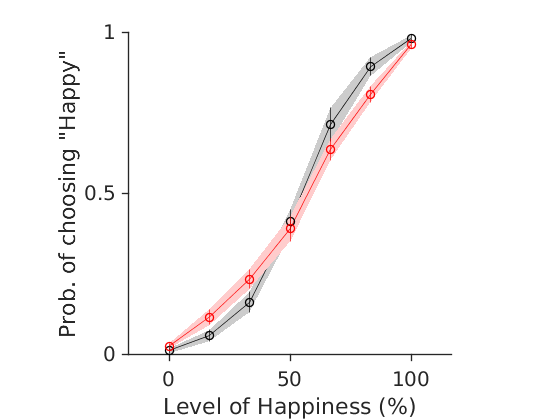

In [50]:
ctrl = get_behavioral_matrix('behavior',behavior, 'condition','ASD_Ctrl');
asd = get_behavioral_matrix('behavior',behavior, 'condition','ASD');

figure;
boundedline(1:7,squeeze(nanmean(nanmean(ctrl(:,:,:),2),3)),squeeze(nanstd(nanmean(ctrl(:,:,:),2),[],3))/sqrt(15),'k')
hold on
boundedline(1:7,squeeze(nanmean(nanmean(asd(:,:,:),2),3)),squeeze(nanstd(nanmean(asd(:,:,:),2),[],3))/sqrt(18),'r')
errorbar(1:7,squeeze(nanmean(nanmean(ctrl,2),3)),squeeze(nanstd(nanmean(ctrl,2),[],3))/sqrt(15),'ko', 'capsize',0)
hold on
errorbar(1:7,squeeze(nanmean(nanmean(asd,2),3)),squeeze(nanstd(nanmean(asd,2),[],3))/sqrt(18),'ro', 'capsize',0)        
polishFigure
set(gca, 'plotboxaspectratio',[1 1 1], 'xtick', [1 4 7], 'ytick', [1 1.5 2], 'yticklabel',{'0','0.5', '1'}, 'xticklabel',{'0', '50', '100'})
ylabel('Prob. of choosing "Happy"')
xlabel('Level of Happiness (%)')

Figure 2B

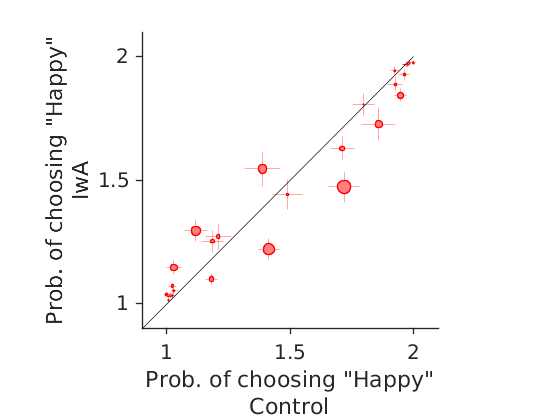

In [51]:
ctrl = get_behavioral_matrix('behavior',behavior, 'condition','ASD_Ctrl');
asd = get_behavioral_matrix('behavior',behavior, 'condition','ASD');

figure;
ctrl = reshape(ctrl,[],size(ctrl,3));
asd = reshape(asd,[],size(asd,3));
nrImages = size(ctrl,1);
x = nanmean(ctrl,2);
y = nanmean(asd,2);
x_err = mad(ctrl,[],2)./sqrt(size(ctrl,2));
y_err = mad(asd,[],2)./sqrt(size(asd,2));
ms = 20*abs(x-y); % just a scaling factor per effect size
for i = 1:nrImages, 
errorbar(x(i),y(i),y_err(i),'o','color', [1 0.5 0.5],...
    'capsize',0, 'markerfacecolor', [1 0.5 0.5], 'markeredgecolor', 'r', 'markersize',ms(i)*2)
hold on
errorbar(x(i),y(i),y_err(i),'horizontal','o','color', [1 0.5 0.5],...
    'capsize',0, 'markerfacecolor', [1 0.5 0.5], 'markeredgecolor', 'r', 'markersize',ms(i)*2)

end
polishFigure
plot([0.9 2],[0.9 2], 'k')
set(gca, 'xtick', [1 1.5 2], 'ytick', [1 1.5 2])
xlabel({'Prob. of choosing "Happy"';'Control'})
ylabel({'Prob. of choosing "Happy"';'IwA'})
xlim([0.9 2.1])
ylim([0.9 2.1])

Figure 2A

mean reliability (control) = 0.73304
mean reliability (asd) = 0.70227


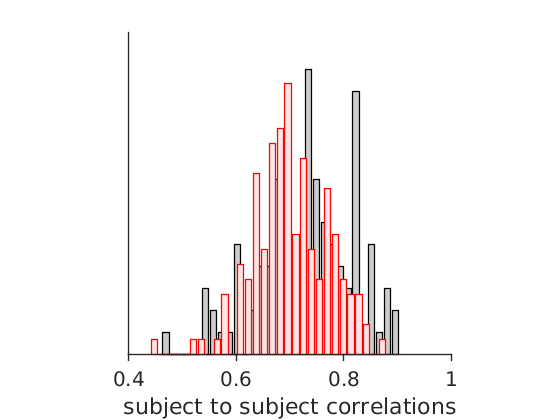

In [52]:
ctrl = get_behavioral_matrix('behavior',behavior, 'condition','ASD_Ctrl');
asd = get_behavioral_matrix('behavior',behavior, 'condition','ASD');
ctrl = reshape(ctrl,[],size(ctrl,3));
asd = reshape(asd,[],size(asd,3));

intcon_ctrl = get_subject_to_subject_corr(ctrl,[]);
intcon_asd = get_subject_to_subject_corr(asd,[]);

[n1,x1]=hist(intcon_ctrl,30);
bar(x1,n1./sum(n1), 'facecolor', [0.8 0.8 0.8],  'edgecolor','k','linewidth',1);
hold on
[n2,x2]=hist(intcon_asd,30);
bar(x2,n2./sum(n2), 'facecolor', [1 0.9 0.9],'edgecolor','r', 'linewidth',1);
set(gca, 'ytick',[])
polishFigure;
xlabel('subject to subject correlations')
disp(['mean reliability (control) = ', num2str(nanmean(intcon_ctrl))])
disp(['mean reliability (asd) = ', num2str(nanmean(intcon_asd))])

Figure 2C


p =

  4.2291e-150


stats = 

  struct with fields:

    tstat: -51.1070
       df: 299
       sd: 0.0290


ans =

    0.0856



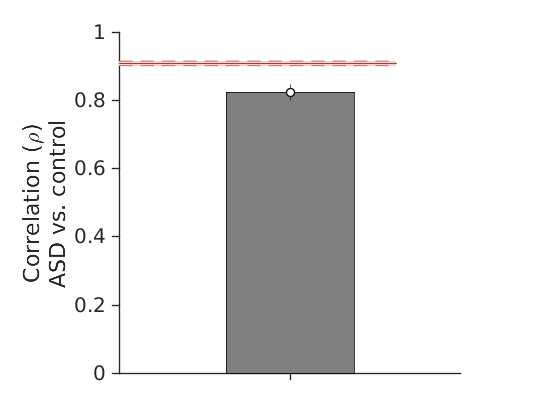

In [56]:
fig = figure;
[ns, ns_err, raw_corr] = est_noiseCeiling(ctrl,asd,0);
con = nanmean((raw_corr));
con_err = mad((raw_corr));
boundedline([0 0.65], [ns ns], [ns_err ns_err], 'r')
plot([0 0.65], [ns ns], 'r')
hold on
plot([0 0.65], [ns+ns_err ns+ns_err], 'r--')
plot([0 0.65], [ns-ns_err ns-ns_err], 'r--')
bar(0.4, con,'facecolor', [0.5 0.5 0.5], 'barwidth',0.3)
errorbar(0.4, con, con_err, 'ko', 'markerfacecolor','w', 'capsize',0)
polishFigure;
[~,p, ~,stats]=ttest(raw_corr, ns, 'tail', 'left')
ylim([0 1])
ylabel({'Correlation (\rho)'; 'ASD vs. control'})
set(gca, 'xtick', 0.4, 'xticklabel', {''})
ns-nanmean(raw_corr)